In [1]:

from time import time

t0 = time()

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import soundfile as sf
import os
import librosa
import numpy as np
import glob
import pandas as pd
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import numpy as np

In [3]:
def get_features(file_name):

    if file_name: 
        X, sample_rate = sf.read(file_name, dtype='float32')

    mfccs = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40)
    mfccs_scaled = np.mean(mfccs.T,axis=0)
    return mfccs_scaled

In [4]:
def extract_features():

    sub_dirs = os.listdir('ESC-10/audio')
    sub_dirs.sort()
    features_list = []
    for label, sub_dir in enumerate(sub_dirs):  
        for file_name in glob.glob(os.path.join('ESC-10/audio',sub_dir,"*.wav")):
            print("Extracting file ", file_name)
            try:
                mfccs = get_features(file_name)
            except Exception as e:
                print("Extraction error")
                continue
            features_list.append([mfccs,label])

    features_df = pd.DataFrame(features_list,columns = ['feature','class_label'])
    print(features_df.head())    
    return features_df

In [5]:
def get_numpy_array(features_df):

    X = np.array(features_df.feature.tolist())
    y = np.array(features_df.class_label.tolist())
    le = LabelEncoder()
    yy = to_categorical(le.fit_transform(y))
    return X,yy,le

def get_train_test(X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
    return  X_train, X_test, y_train, y_test

In [6]:
print("Extracting features..")
features_df = extract_features()

Extracting features..
                                             feature  class_label
0  [-309.30853, 88.03026, 1.5384002, 14.649376, -...            0
1  [-309.30853, 88.03026, 1.5384002, 14.649376, -...            0
2  [-281.61264, 103.59526, -8.473426, 7.9012995, ...            0
3  [-281.61264, 103.59526, -8.473426, 7.9012995, ...            0
4  [-324.52615, -3.5978088, -57.639755, 6.270338,...            0


In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [8]:
params = {'C': (0.001,0.005,0.01,0.05,0.1,0.5,1, 10,50, 100, 1000)}

In [9]:
clf_svm = svm.SVC(kernel = 'poly')

In [10]:
svm_grid = GridSearchCV(clf_svm, params, cv=10, verbose = 1,n_jobs=-1,scoring ='accuracy') 
   

In [11]:
X = np.array(features_df.feature.tolist())
y = np.array(features_df.class_label.tolist())
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
svm_grid.fit(X_train, y_train)

Fitting 10 folds for each of 11 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    7.9s finished


GridSearchCV(cv=10, estimator=SVC(kernel='poly'), n_jobs=-1,
             param_grid={'C': (0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 50,
                               100, 1000)},
             scoring='accuracy', verbose=1)

In [12]:
svm_grid.best_params_

{'C': 1000}

In [14]:
X = np.array(features_df.feature.tolist())
y = np.array(features_df.class_label.tolist())
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
svc1 = SVC(kernel='poly',degree=2, C=1000)
svc1 = svc1.fit(X_train, y_train)
acc1 = svc1.score(X_test, y_test)
print("Test Accuracy",acc1*100)

Accuracy 90.83333333333333


In [15]:
print("time taken :", time() - t0)

time taken : 20.44196081161499


In [16]:
X = np.array(features_df.feature.tolist())
y = np.array(features_df.class_label.tolist())
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
svc1 = SVC(kernel='poly',degree=2, C=1000)
svc1 = svc1.fit(X_train, y_train)
acc1 = svc1.score(X_test, y_test)
y_pred = svc1.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)


Confusion Matrix

[[25  0  0  3  0]
 [ 3 17  0  4  0]
 [ 0  0 19  0  0]
 [ 0  0  1 22  0]
 [ 0  0  0  0 26]]


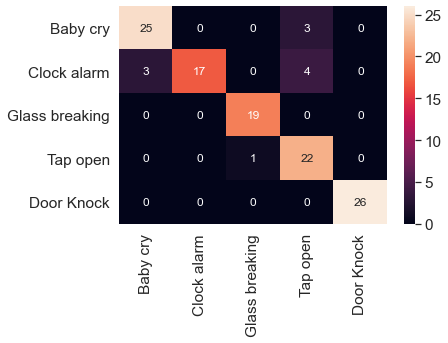

In [19]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = [[ 25,  0,  0,  3,  0],
 [ 3,  17,  0,  4,  0],
 [ 0,  0,  19,  0,  0],
 [ 0,  0,  1,  22,  0],
 [ 0,  0,  0,  0, 26]]

target_names=['Baby cry','Clock alarm','Glass breaking','Tap open','Door Knock']
df_cm = pd.DataFrame(array,target_names,target_names)
sn.set(font_scale=1.4) 
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}) 

plt.show()

In [18]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Baby cry','Clock alarm','Glass breaking','Tap open','Door Knock']))


Classification Report

                precision    recall  f1-score   support

      Baby cry       0.89      0.89      0.89        28
   Clock alarm       1.00      0.71      0.83        24
Glass breaking       0.95      1.00      0.97        19
      Tap open       0.76      0.96      0.85        23
    Door Knock       1.00      1.00      1.00        26

      accuracy                           0.91       120
     macro avg       0.92      0.91      0.91       120
  weighted avg       0.92      0.91      0.91       120

